## **Customer Journey**

The goal of this notebook is to investigate following questions: 

- How do customers enter the business?
- When do they first buy?
- How many customers are returning over time? How many are new?
- What does early customer behavior look like?

These questions make up the customer's journey.



## **Dataset**

The notebooks will be using the same dataset as in Consumer-Behavior---Spending-Analysis project.

The idea is to reframe the problem using the same data.

## **Assumptions**

- The definition for a customer is their unique `cc_num`.
- The definition of an event is a transaction.
- The definition of time is transaction's date.

## **Core Section**

The core of this notebook will be answering these two questions:

- When does each customer first appear?
- How many customers are obtained over time?

The goal of answering these questions is to check whether customre acquistion is flat, growing or perhaps volatile.


In [119]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#downloading the latest version of the dataset
path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

print(os.listdir(path)) # shows the list of all folders and files inside the directory

csv_path = os.path.join(path,'credit_card_transactions.csv') # creates a path from directory to the file

ds = pd.read_csv(csv_path) 

df = pd.DataFrame(ds)


['credit_card_transactions.csv']


In [120]:
#inspecting the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [121]:
#checking if there are any duplicates

is_duplicate = df.duplicated().any()
is_duplicate

np.False_

In [122]:
#checking for missing values

is_missing = df.isna().any()

is_missing.value_counts()

#making a dictionary to store missing value counts
columns_with_missing_values = {}

for column in df.columns:
    missing_count = df[column].isna().sum()
    
    if missing_count > 0:
        columns_with_missing_values[column] = missing_count

columns_with_missing_values

{'merch_zipcode': np.int64(195973)}

In [123]:
#renaming and cleaning up some columns for more clarity

df = df.rename(columns= {"first": "first_name", "last": "last_name", "category": "spending_type"})
df = df.drop("Unnamed: 0", axis=1)
df

,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [124]:
#filling in merch_zipcode NaN values

df["merch_zipcode"] = df["merch_zipcode"].fillna("Unknown")
df

,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Unknown
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Unknown
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,Unknown
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [125]:
#converting trans_date_trans_time to datetime
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])



## **Customer entry and acquisition**

This section shows when each customer first appeared in the dataset and how customer acquisition changes over time. By focusing on first purchase dates, we can spot differences between customer growth driven by acquisition and ongoing activity from existing customers.


In [126]:
#checking when did the first transaction of a customer happen
first_purchase = (
    df.groupby("cc_num")["trans_date_trans_time"]
      .min()
      .reset_index(name="first_purchase_date")
)
first_purchase

,cc_num,first_purchase_date
0,60416207185,2019-01-01 12:47:15
1,60422928733,2019-01-03 18:38:26
2,60423098130,2019-01-01 06:48:36
3,60427851591,2019-01-01 07:36:27
4,60487002085,2019-01-06 03:23:55
...,...,...
978,4958589671582726883,2019-01-01 01:38:31
979,4973530368125489546,2019-01-03 12:31:03
980,4980323467523543940,2019-01-02 07:45:21
981,4989847570577635369,2019-01-02 13:15:20


In [127]:
#dividing customers into new and returning ones
#new customer is one whose transaction date equals first purchase date
#returning customer is one whose transaction date doesn't equal first purchase date

df = df.merge(first_purchase, on="cc_num", how="left") #merging the pivot table so we can compare the two dates


def customer_label(row):
    if row["trans_date_trans_time"] == row["first_purchase_date"]:
        return "New Customer"
    else:
        return "Returning Customer"

df["customer_label"] = df.apply(customer_label, axis=1) #creating a new column to show if it's a new or returning customer

df

,trans_date_trans_time,cc_num,merchant,spending_type,amt,first_name,last_name,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,first_purchase_date,customer_label
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019-01-01 00:00:18,New Customer
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,Unknown,2019-01-01 00:00:44,New Customer
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,2019-01-01 00:00:51,New Customer
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,Unknown,2019-01-01 00:01:16,New Customer
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,2019-01-01 00:03:06,New Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,Unknown,2019-01-01 09:42:51,Returning Customer
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0,2019-01-01 05:40:03,Returning Customer
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0,2019-01-01 00:09:03,Returning Customer
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0,2019-01-01 03:37:04,Returning Customer


In [128]:
#seeing how many are new and how many are returning customers
df["customer_label"].value_counts()



customer_label
Returning Customer    1295692
New Customer              983
Name: count, dtype: int64

In [129]:
#finding the month of the first purchase

first_purchase["first_purchase_month"] = (
    first_purchase["first_purchase_date"]
    .dt.to_period("M")
)

#counting customers per month
new_customers_per_month = (
    first_purchase.groupby("first_purchase_month")["cc_num"]
    .nunique()
    .reset_index(name="new_customers")
)
new_customers_per_month

,first_purchase_month,new_customers
0,2019-01,913
1,2019-02,9
2,2019-03,8
3,2019-04,5
4,2019-05,1
5,2019-07,2
6,2019-08,3
7,2019-09,5
8,2019-10,4
9,2019-11,3


/var/folders/dp/8_ff0nm97bz6dbzpgg7jcvmm0000gn/T/ipykernel_43669/530691957.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=new_customers_per_month["first_purchase_month"], rotation=45)


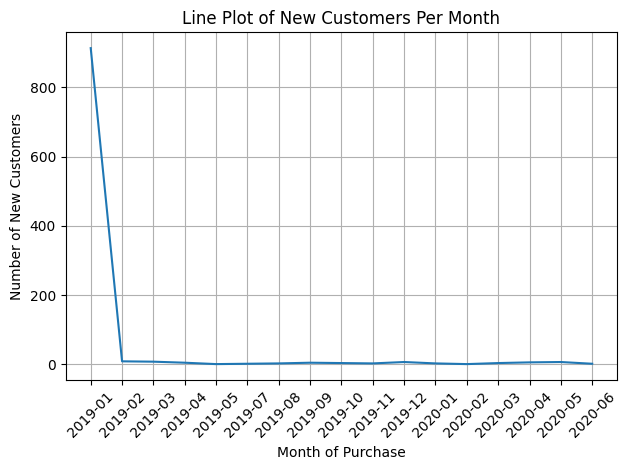

In [ ]:
#making a lineplot out of new customers per month

fig, ax = plt.subplots()

sns.lineplot(

    data= new_customers_per_month,
    x= "first_purchase_month",
    y= "new_customers",
    ax=ax,
    
    
    
)
ax.set_xticklabels(labels=new_customers_per_month["first_purchase_month"], rotation=45)
ax.set_xlabel("Month of Purchase")
ax.set_ylabel("Number of New Customers")
ax.set_title("Line Plot of New Customers Per Month")
ax.grid(True)
plt.tight_layout()
plt.show()

Customer acquisition is highly concentrated at the beginning of the observation period, followed by consistently low levels of new customer growth. This suggests that the dataset reflects a mature customer base, with limited ongoing acquisition after the initial surge of customers.


In [ ]:
#checking to see if each customer have exactly one “New Customer” transaction?
new_counts_per_customer = (
    df.assign(is_new=df["customer_label"].eq("New Customer"))
      .groupby("cc_num")["is_new"]
      .sum()
)

new_counts_per_customer.value_counts()


is_new
1    983
Name: count, dtype: int64

## **New vs returning customer activity**

To understand whether business activity is driven by customer acquisition or retention, transactions are analyzed by customer type over time.


In [ ]:
#checking whether activity is driven by new customers or returning customers over time
monthly_mix = (
    df.groupby([pd.Grouper(key="trans_date_trans_time", freq="M"), "customer_label"])
      .size()
      .reset_index(name="transactions")
)

monthly_mix["trans_date_trans_time"] = monthly_mix["trans_date_trans_time"].dt.to_period("M").astype(str)
monthly_mix.head()


/var/folders/dp/8_ff0nm97bz6dbzpgg7jcvmm0000gn/T/ipykernel_43669/2514788609.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key="trans_date_trans_time", freq="M"), "customer_label"])


,trans_date_trans_time,customer_label,transactions
0,2019-01,New Customer,913
1,2019-01,Returning Customer,51612
2,2019-02,New Customer,9
3,2019-02,Returning Customer,49857
4,2019-03,New Customer,8


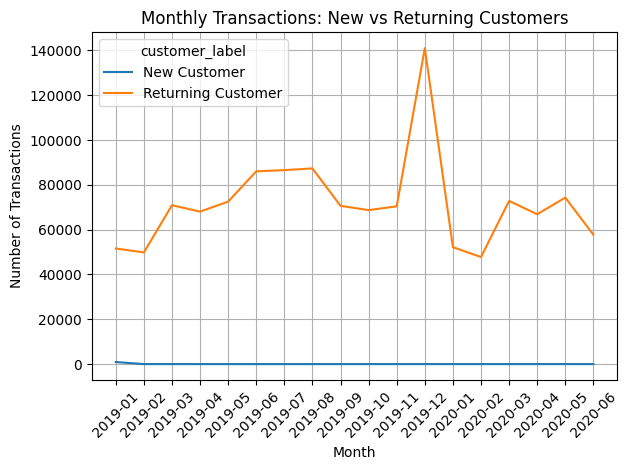

In [ ]:
#making a lineplot to showcase new vs returning customers' number of transactions
fig, ax = plt.subplots()
sns.lineplot(data=monthly_mix, x="trans_date_trans_time", y="transactions", hue="customer_label", ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel("Number of Transactions")
ax.set_title("Monthly Transactions: New vs Returning Customers")
ax.tick_params(axis="x", rotation=45)
ax.grid(True)
plt.tight_layout()


Returning customers account for the majority of transaction activity across all months. Even during periods with new customer acquisition, returning customer behavior dominates overall engagement, highlighting the importance of customer retention.


## **Early customer behavior**

This section examines customer activity during the first 30 days following their initial purchase to understand early engagement patterns.


In [ ]:
#inspecting what do customers do right after their first purchase
df["days_since_first_purchase"] = (df["trans_date_trans_time"] - df["first_purchase_date"]).dt.days

df_30d = df[df["days_since_first_purchase"].between(0, 30)].copy()

early_metrics = (
    df_30d.groupby("cc_num")
          .agg(
              txn_30d=("amt", "count"),
              spend_30d=("amt", "sum")
          )
          .reset_index()
)

early_metrics.describe()


,cc_num,txn_30d,spend_30d
count,9.830000e+02,983.000000,983.000000
mean,4.187596e+17,54.868769,4312.256358
std,1.306864e+18,32.911751,2792.011180
min,6.041621e+10,7.000000,420.780000
25%,1.800393e+14,24.000000,2193.920000
50%,3.525591e+15,51.000000,3741.750000
75%,4.664025e+15,77.500000,5765.780000
max,4.992346e+18,161.000000,15548.390000


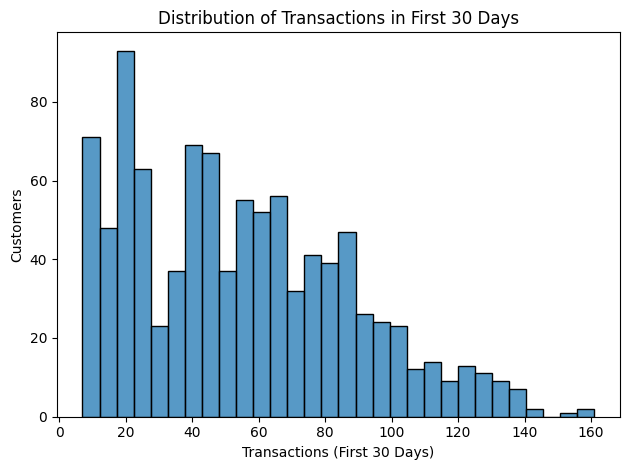

In [ ]:
#making a histogram for distribution of transactions in the first 30 days
fig, ax = plt.subplots()
sns.histplot(data=early_metrics, x="txn_30d", bins=30, ax=ax)
ax.set_title("Distribution of Transactions in First 30 Days")
ax.set_xlabel("Transactions (First 30 Days)")
ax.set_ylabel("Customers")
plt.tight_layout()


The distribution shows that while many customers engage at a moderate level early on, a smaller group has significantly higher transaction frequency within the first 30 days. This early engagement pattern may serve as an indicator of long term customer value.


## **Key Takeaways**

- Customer acquisition is front loaded, with most customers entering the business early in the observation period.
- Transaction activity is overwhelmingly driven by returning customers rather than new acquisitions.
- Early customer behavior shows meaningful variation, with a subset of customers displaying high engagement shortly after their first purchase.

These findings establish a foundation for further lifecycle analysis, including customer churn and reactivation patterns.
